In [76]:
# Importing all the libraries

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [77]:
#Loading the dataset  
df = pd.read_csv('/Users/ahtiholli/Downloads/data/europarl.csv', header = None)
df.rename(columns={0: 'Language'}, inplace=True)
df.rename(columns={1: 'Text'}, inplace=True)
df.head()


,Language,Text
0,bg,Състав на Парламента: вж. протоколи
1,bg,Одобряване на протокола от предишното заседани...
2,bg,Състав на Парламента: вж. протоколи
3,bg,Проверка на пълномощията: вж. протоколи
4,bg,Внасяне на документи: вж. протоколи


In [78]:
#The dataset is sorted by language, thus we need to randomize the indexes it for optimizing learning
reindexed_df = df.sample(frac=1).reset_index(drop=True)
reindexed_df.head()
reindexed_df.count()

reindexed_df.head()


,Language,Text
0,sk,"musím však povedať, že zo strany tabakového pr..."
1,sl,"gospod predsednik, komisija veliko govori o sp..."
2,cs,"a konečně, musí existovat opatření pro sladění..."
3,lv,(aplausi)
4,en,i would be grateful to you because you made an...


In [79]:
#Separating the variables and then converting the categorial language value into a numerical value

reindexed_df = df.sample(frac=0.01, random_state=100) .reset_index(drop=True)
print(reindexed_df.head())

y_lang = reindexed_df['Language']
X = reindexed_df['Text']
y_uniq = np.unique(y_lang) # 20 distinct languages
le = LabelEncoder()
y = le.fit_transform(y_lang)



  Language                                               Text
0       de  herr verheugen in dem interview: "es gehört zu...
1       de  deshalb werden die abgeordneten unserer frakti...
2       hu  a gyermekkereskedelem és pornográfia növekedés...
3       nl  het europees parlement heeft zich op 19 novemb...
4       nl  gelijke kansen van vrouwen in de wetenschap mo...


In [80]:
#Now we'll preprocess the text and remove any symbols and numbers, also transform the text into lower case
list_of_sentences = []

for sentence in X:

    sentence = re.sub(r'[!@#$(),"%^*?:.;~`0-9]', '', sentence)
    sentence = re.sub(r'[[]]', '', sentence)
    sentence = sentence.lower()
    list_of_sentences.append(sentence)
        

list_of_sentences[:5]        
        


['herr verheugen in dem interview es gehört zu den fast tragischen entwicklungen der letzten jahre dass das parlament nur in einem einig ist in der opposition zur kommission  herr verheugen welches verständnis haben sie von diesem europäischen parlament sie wären nicht im amt wenn sie nicht unsere zustimmung bekommen hätten',
 'deshalb werden die abgeordneten unserer fraktion für die drei heute vorgelegten änderungsanträge stimmen die darauf abzielen die arbeitsweise des beratenden ausschusses für fischerei und aquakultur zu verbessern ihn den betreffenden berufsgruppen und den bedürfnissen der mitgliedstaaten besser anzupassen und schließlich von der kommission zu fordern daß sie dem rat und dem europäischen parlament jährlich einen bericht über die debatten innerhalb dieses ausschusses unterbreitet denn an diesen debatten sind alle institutionen der gemeinschaft und nicht nur die kommission interessiert geht es uns doch darum zu einer ausrichtung der gemeinsamen fischereipolitik beit

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

#We'll apply the count vectorizer in chunks because of the large sample size and without the chunking the kernel was crashing
cv = CountVectorizer()

cv.fit(list_of_sentences)

chunk_size = 500


X_final = None

for i in range(0, len(list_of_sentences), chunk_size):
    chunk_sentences = list_of_sentences[i:i + chunk_size]

    X_chunk = cv.transform(chunk_sentences).toarray()

    if X_final is None:
        X_final = X_chunk
    else:
        X_final = np.concatenate((X_final, X_chunk), axis=0)


print(X_final.shape)



(8323, 112846)


In [82]:

X_train, X_test, Y_train, Y_test = train_test_split(X_final,y, test_size = 0.2)

In [83]:
#We'll use Multinomial Native Bayes classification model for this instance for it's simplicity, quickness. For a more advanced solution neural networks should be considered as an option

model = MultinomialNB()
model.fit(X_train, Y_train)


MultinomialNB()

In [84]:
y_pred = model.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
ac = accuracy_score(Y_test, y_pred)
prec = precision_score(Y_test, y_pred, average=None)
rec = recall_score(Y_test, y_pred, average=None)
prec_dict = {"Language": y_uniq, "Precision score":prec}
prec_df = pd.DataFrame(prec_dict)

print(f"Accuracy is : {ac:.6f}")
print(f"Precisions for each language : \n {prec_df}")

Accuracy is : 0.990390
Precisions for each language : 
    Language  Precision score
0        bg         1.000000
1        cs         1.000000
2        da         1.000000
3        de         1.000000
4        el         1.000000
5        en         0.988095
6        es         0.929412
7        et         1.000000
8        fi         1.000000
9        fr         0.980198
10       hu         0.956522
11       it         0.974359
12       lt         0.986301
13       lv         1.000000
14       nl         1.000000
15       pl         1.000000
16       pt         1.000000
17       ro         1.000000
18       sk         0.982759
19       sl         1.000000
20       sv         1.000000


From the precision chart we can observe that the languages that have distinct characters or don't have close relatives in the dataset, are more easily recognisable by the model. For example, Portuguese has a precision of 1, even it is closely related with Spanish. This is likely due to the fact that Portuguese language has symbols like ç and ã. This can be further studied with a confusion matrix
  

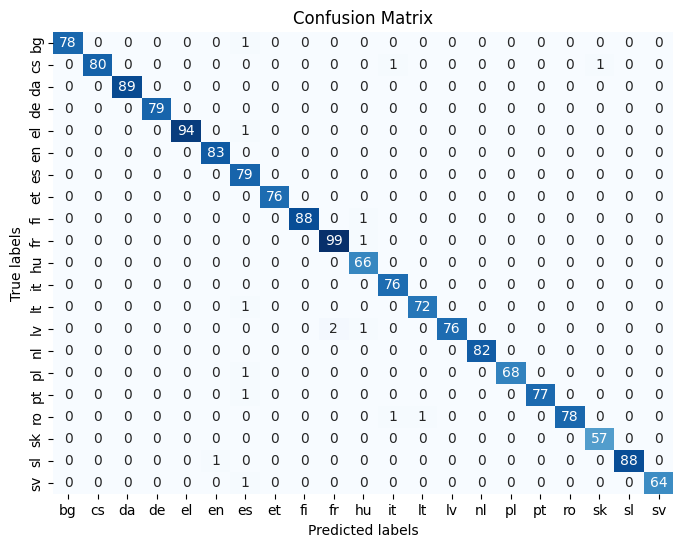

In [86]:
#Lets see the confusion matrix

cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels= y_uniq, yticklabels=y_uniq)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [87]:
# Let's create a function to test the model
def predict(text):
     x = cv.transform([text]).toarray() 
     lang = model.predict(x) 
     lang = le.inverse_transform(lang) 
     print("The language is in",lang[0])
    
    

In [88]:
#English
predict('Machine learning (ML) is an umbrella term for solving problems for which development of algorithms by human programmers would be cost-prohibitive, and instead the problems are solved by helping machines discover their own algorithms')

The language is in en


In [89]:
#Finnish
predict('Koneoppiminen (ML) on sateenvarjotermi sellaisten ongelmien ratkaisemiselle, joihin algoritmien kehittäminen ihmisohjelmoijien toimesta olisi liian kallista, ja sen sijaan ongelmat ratkaistaan auttamalla koneita "löytämään" omat algoritminsa.')

The language is in fi


In [90]:
#Spanish
predict('El aprendizaje automático (AM) es un término genérico para resolver problemas para los que el desarrollo de algoritmos por parte de programadores humanos resultaría prohibitivo y, en su lugar, los problemas se resuelven ayudando a las máquinas a "descubrir" sus "propios" algoritmos.')

The language is in es


In [91]:
#French
predict("L'apprentissage automatique est un terme générique qui désigne la résolution de problèmes pour lesquels le développement d'algorithmes par des programmeurs humains serait prohibitif, et qui sont résolus en aidant les machines à découvrir leurs propres algorithmes.")

The language is in fr


In [92]:
#Portuguese
predict('A aprendizagem automática (AM) é um termo genérico para a resolução de problemas para os quais o desenvolvimento de algoritmos por programadores humanos teria custos proibitivos e, em vez disso, os problemas são resolvidos ajudando as máquinas a "descobrir" os seus "próprios" algoritmos')

The language is in pt


In [93]:
#Swedish
predict('Maskininlärning (ML) är ett samlingsnamn för problemlösning där det skulle vara för dyrt för mänskliga programmerare att utveckla algoritmer, och där problemen istället löses genom att hjälpa maskiner att "upptäcka" sina "egna" algoritmer')

The language is in sv
